# Assignment 3 - Supervised Learning

## *Kate Coulter*
Netid:  *kvc6*

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**

**(a)** For this supervised learning exploration I have chosen to work with FiveThirtyEight's ongoing data collection effort entitled, *"Tracking Congress In the Age of Trump"*. This dataset tracks the support individual members of Congress have for President Trump. I am interested in social science issues that tend to end up needing NLP data for analyses, but I like many others have become fascinated with Trump's Presidency as well as the turbulent political environment that has followed. Congressional data is tricky to work with for many reasons,  particularly given the pacing of how the US political system allows items to progress. However, this dataset seems like an opportunity to address how machine learning techniques can be further applied to the social sciences, specifically political science. By working through this data and applying machine learning techniques to a dataset I am interested in and have domain knowledge to understand, I hope to come up with more ways that I can apply computational techniques to political questions. I will focus on trying to predict 

In [67]:
# b
# load data
import pandas as pd

trump = pd.read_csv("trump_congress1.csv")

print(trump.columns.values)
#print(trump.shape)
#print(trump.dtypes)
print('='*30)

#filter so only looking at records for members of the senate
trump = trump[trump['chamber'].isin(['senate'])]

#include relevant variables - congress, vote, trump_position, 
# last_name (label type), party, and agree
# others are redundant or irrelevant for our analysis

trump = trump.loc[:, ['congress', 'vote', 'trump_position', 'last_name', 'party', 'agree']]
#print(trump.columns.values)

print(trump.shape)
print('='*30)

#print(trump.dtypes)
print(trump.isna().all())
print('='*30)

print(trump.head())
print('='*30)

#no missing values, which is good

#make everything categorical
#trump = trump.astype('category')

#every variable is categorical, so need to get sense of how distribution is for general dataset
#through tables and barcharts

print(trump.groupby("agree").size())
print('='*30)

print(trump.groupby("vote").size())
print('='*30)

print(trump.groupby("trump_position").size())
print('='*30)

print(trump.groupby("party").size())
print('='*30)

print(trump.groupby("congress").size())
print('='*30)

['congress' 'bill_id' 'roll_id' 'chamber' 'voted_at' 'bioguide' 'vote'
 'trump_position' 'last_name' 'state' 'district' 'party' 'agree' 'yesno'
 'predicted_probability']
(8999, 6)
congress          False
vote              False
trump_position    False
last_name         False
party             False
agree             False
dtype: bool
     congress vote trump_position   last_name party  agree
431       115   No        support     Baldwin     D      0
432       115   No        support      Bennet     D      0
433       115   No        support  Blumenthal     D      0
434       115   No        support      Booker     D      0
435       115   No        support       Brown     D      0
agree
0    3628
1    5371
dtype: int64
vote
No         3149
Present     124
Yes        5726
dtype: int64
trump_position
oppose     1299
support    7700
dtype: int64
party
D    4161
I     179
R    4659
dtype: int64
congress
115    8400
116     599
dtype: int64


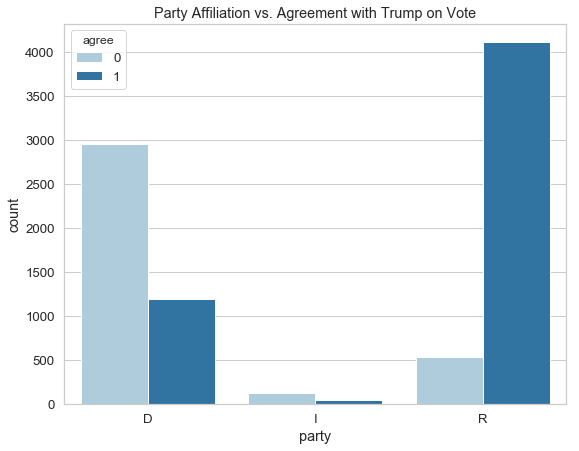

In [68]:

#data looks okay to proceed to plots with the exception of the vote category
import seaborn as sns
%matplotlib inline 
mpl.rcParams['figure.figsize'] = (9,7)
sns.set(style="whitegrid", font_scale=1.2)
sns.set_palette("Paired")

#trump_table = pd.crosstab(index = trump)
#sns.countplot(x='party', hue='agree', data=trump, palette = 'hls')

plt.title('Party Affiliation vs. Agreement with Trump on Vote')
sns.countplot(x='party', hue='agree', data=trump)



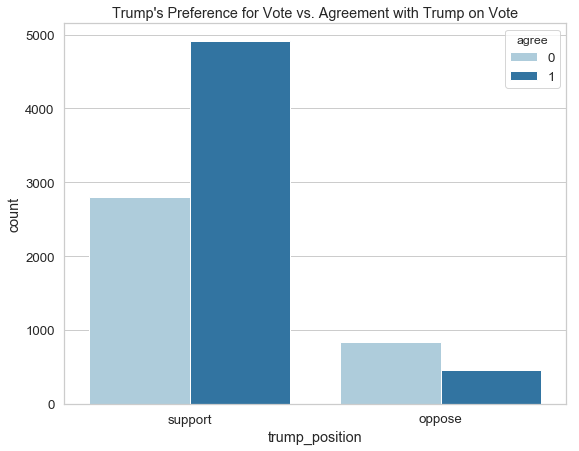

In [69]:
plt.title('Trump\'s Preference for Vote vs. Agreement with Trump on Vote')
sns.countplot(x='trump_position', hue='agree', data=trump)

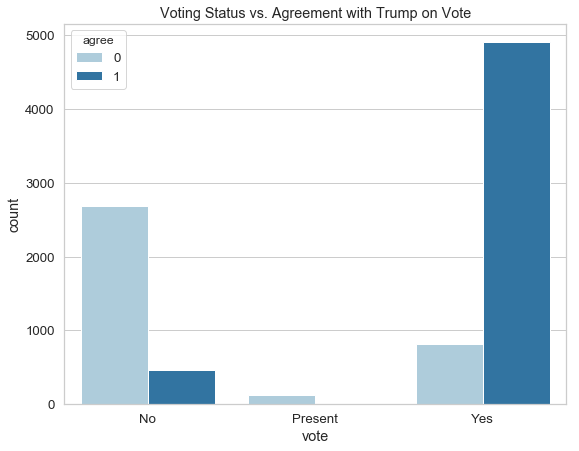

In [70]:
plt.title('Voting Status vs. Agreement with Trump on Vote')
sns.countplot(x='vote', hue='agree', data=trump)

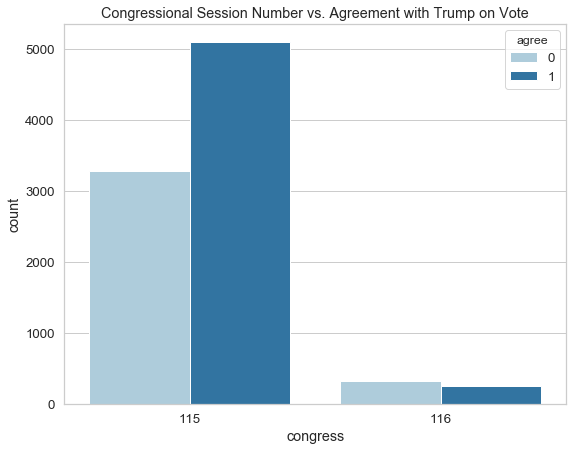

In [71]:
plt.title('Congressional Session Number vs. Agreement with Trump on Vote')
sns.countplot(x='congress', hue='agree', data=trump)

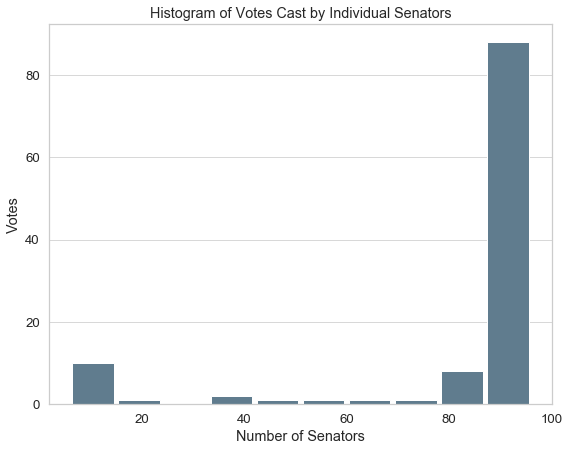

In [72]:
senfreq = (trump.groupby("last_name").size())
senfreq.plot.hist(grid = False, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title('Histogram of Votes Cast by Individual Senators')
plt.xlabel('Number of Senators')
plt.ylabel('Votes')
plt.grid(axis='y', alpha=0.75)

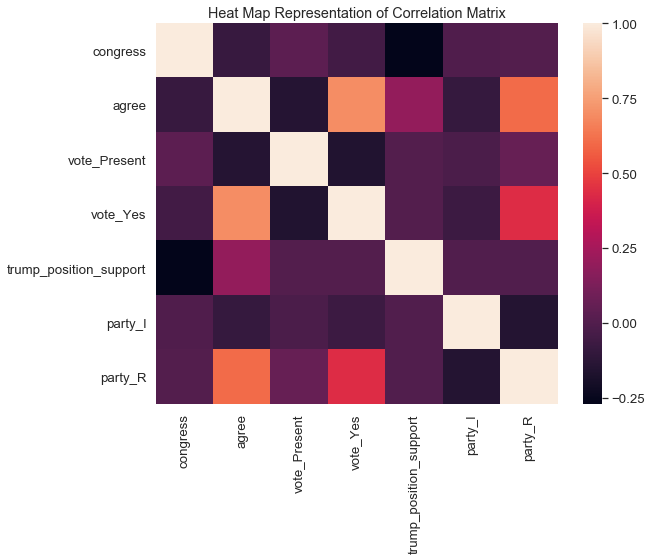

In [73]:
#plot correlations to see relationships between variables
trumpdummy = pd.get_dummies(trump[dummylist], drop_first = True)
corr = trumpdummy.corr()
ax = plt.axes()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        ax = ax)
ax.set_title('Heat Map Representation of Correlation Matrix')
plt.show()

In [74]:
print(corr)

                        congress     agree  vote_Present  vote_Yes  \
congress                1.000000 -0.084984      0.033448 -0.046465   
agree                  -0.084984  1.000000     -0.143820  0.701401   
vote_Present            0.033448 -0.143820      1.000000 -0.156343   
vote_Yes               -0.046465  0.701401     -0.156343  1.000000   
trump_position_support -0.269601  0.200661      0.005152  0.004959   
party_I                -0.002921 -0.088967     -0.016839 -0.067658   
party_R                 0.007033  0.606731      0.064484  0.438477   

                        trump_position_support   party_I   party_R  
congress                             -0.269601 -0.002921  0.007033  
agree                                 0.200661 -0.088967  0.606731  
vote_Present                          0.005152 -0.016839  0.064484  
vote_Yes                              0.004959 -0.067658  0.438477  
trump_position_support                1.000000  0.001899 -0.000301  
party_I                  

**(c)** The question I will investigate in this supervised learning exploration is as follows:

Given historical voting records as well as key identifiers of a senator, can you predict if that senator will vote with or against Trump's Agenda. My target variable is the variable "agree", a dummy variable that has two classes indicating if that particular vote was cast in harmony or against President Trump's agenda. For class = 0, the vote placed was not in agreement with what President Trump would have done and, for class = 1, the vote placed was in concordance with Trump's agenda and is a vote he too would have placed.

I will use the following variables to aid in my prediction:
-  congress: a binary variable coded 0 if this vote took place in the 115th congressional session or is coded 1 if this vote took place in the 116th congressional session
-  trump_position: a binary variable indicating President Trump's support for the bill being voted on for that data point, coded 0 if Trump opposed the bill passing and coded 1 if Trump supported the bill
-  party: a categorical variable indicating whether that senator is of the Democratic, Republic, or Independent political party
-  last_name: used as an index and for labeling purposes to identify potential outliers, has 113 possible values (1 for each senator that has been in office during President Trump's presidency), with a minimum count of votes of 6 and a maximum cast by one senator of 90
-  vote: the vote of that senator on a particular bill given a particular day. Categorical with 3 possible values: coded 0 if that senator did not vote in favor for the bill but instead cast a vote of nay, coded 1 if the senator voted in favor of that bill on that day thus casting a vote in favor of the bill, and coded 2 if their vote was recorded as being present, indicating that the senator was either not present for that vote but was in attendance for that senate session or that they purposefully abstained from voting, perhaps as a way of stating their opinion on the bill. Note that senators not physically present would automatically be recorded as a 0, or a vote against a bill.

My dataset required preprocessing in the sense that given it didn't have a codebook or dictionary, quite a bit of outside research had to be done to infer what each variable was actually measuring. There are no missing values for the datapoints included, which are those cast by senators. The dataset I will use dose not include votes cast by the House of Representatives due to the varying nature of how differently these bodies vote and behave. In the future a similar supervised learning exploration could be done using those data points, and perhaps should include variables I have filtered out as being erroneous for this case.

**(d)** I will use logistic regression for this question due to the binary nature of our outcome variable, agree. Additionally, because we do not have many assumptions about which variables may matter for this prediction or why logistic regression offers the opportunity to investigate which variables are making a difference using feature importance. In the first question for this assignment we also saw that by using the logistic regression classification we can get individual probability scores for which class every data point is predicted to be in, and as this is something that FiveThirtyEight has as a goal for themselves in collecting the data it will be interesting to see how our analysis and future work with this data compare. 

**(e)** To evaluate the performance of this classifier, I will use ROC curves, precision recall curves, and accuracy scores. It will be interesting to see the differences between these evaluation methods, as I have a feeling that they may not align like they would so for other data. If the prediction for whether a vote is in agreement or disagreement with Trump's position is made completely randomly, I would expect an accuracy score and AUC value of approximately 0.5, as there are two classes (whether that vote agreed with Trump or if it did not). Anything above 0.5 will indicate success, therefore, although it might not look like much given this experimental approach being taken here.

**(f)** I will be using cross validation for my model due to concerns I have about balance within the dataset. For example, the Independent Party has very few members and, as shown in the histogram, there is a definite split for number of votes with the majority of senators being at the top or the bottom for counts. 
splitting my dataset into training and test sets

In [133]:
# f continued
# divide data into training and testing sets
# make dummy variables
dummylist = ['congress', 'vote', 'trump_position', 'party', 'agree']
trump2 = pd.get_dummies(trump[dummylist], drop_first = True)

ydata = trump2['agree']
xdata = trump2.drop('agree', 1)

from sklearn.linear_model import LogisticRegression
skf = StratifiedKFold(n_splits=5)
yhat = np.zeros(y.shape)

skf = StratifiedKFold(n_splits=3, shuffle = True)


# X has to have rows - observation, columns - variables, y - 1D
x = xdata
y = ydata
y = y.astype('int')

x = np.array(x)
y = np.array(y)


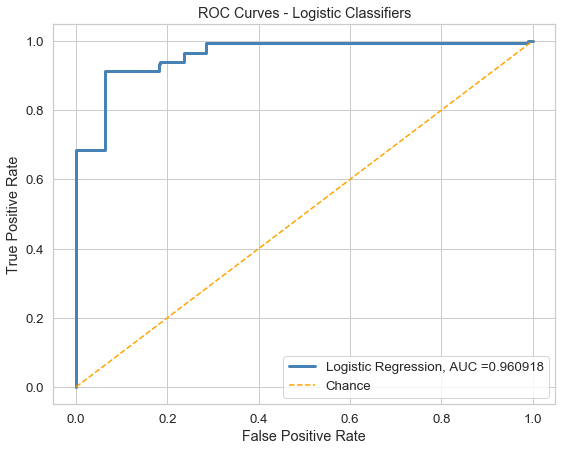

In [146]:
for i,j in skf.split(x,y):
    x_train, x_test = x[i], x[j]
    y_train, y_test = y[i], y[j]
    with warnings.catch_warnings(): 
        warnings.simplefilter("ignore")
        logreg = LogisticRegression(solver='lbfgs', max_iter=500, random_state=29).fit(x_train, y_train)
        yhat[j] = logreg.predict_proba(x_test)[:,1]
        
fpr, tpr, thr = metrics.roc_curve(y, yhat, pos_label=1)
auc = metrics.roc_auc_score(y, yhat)
leglog = 'AUC = {:0.4f}'.format(auc)

plt.plot(fpr, tpr, linewidth = 3, color = 'steelblue',
         label='Logistic Regression, AUC ={:2f}'.format(auc))
plt.plot([0,1],[0,1],'--', color='orange', label='Chance')
plt.title('ROC Curves - Logistic Classifiers')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [147]:
from sklearn.metrics import accuracy_score

predicts = logreg.predict(x_test)
acc = accuracy_score(y_test, predicts)
print('Model Accuracy Score: ' + str(acc))

Model Accuracy Score: 0.9033011003667889


In [148]:
pd.crosstab(y_test, predicts, rownames = ['True'], colnames = ['Predicted'], margins = True)


Predicted,0,1,All
True,,,
0,1070,139,1209
1,151,1639,1790
All,1221,1778,2999


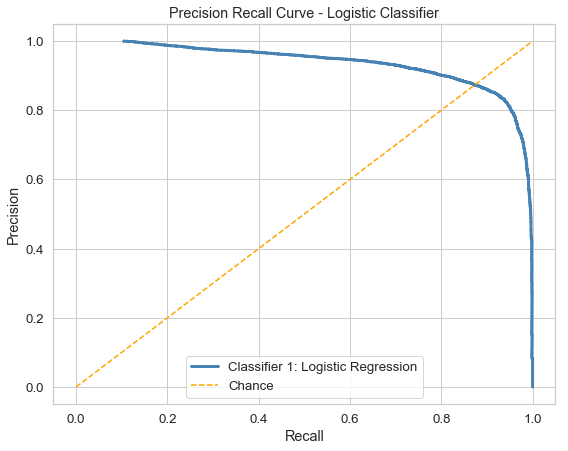

In [149]:
# plot PR curve

prec, rec, thr = metrics.precision_recall_curve(y, yhat)

plt.plot(precl, recl, color = 'steelblue', linewidth = 3, label='Classifier 1: Logistic Regression')
plt.plot([0,1],[0,1],'--', color='orange', label='Chance')

plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision Recall Curve - Logistic Classifier')
plt.legend()
plt.show()

**(h)** 
My model did much better than I had hoped and overall performed very well. The ROC and PR curves are plotted above, and as one can see fit a trend that would imply a good prediction and fit with our classifier. This classifier has an AUC of 0.9609, an accuracy score of 0.9033, and the cross tabulation that shows how the model did specifically as a confusion matrix also indicates that this model worked well. In the future, though, I think that the data should be not quite as dumbed down as I made it. I was very fearful that this would be a failed attempt at something creative but with no follow through, but a logitic regression classifier seems to be able to predict how senators will vote in regards to President Trump's agenda much better than sheer chance, and in general very well.

**(i)** 
While data science is becoming more apparent across the social sciences, the interdisciplinary crossing of machine learning and political science is still rare to the point where examples of applications are hard to find. Using this as fuel, I chose a dataset created by FiveThirtyEight that monitored Congress members voting records as well as recorded if that vote was in accordance with President Trump's agenda or not, thus indicating a measure of support that one cannot usually find for congressional members beyond their public comments that may or may not accurately reflect their views. I used all categorical variables from the dataset, including party identification, which congressional session this vote took place, as well as the voting specifics of how exactly the vote was cast, not just in favor or against. The simple logistic regression classifier employed with a cross validation sampling method performed quite well, accuately predicting over 90% of vote behavior. As mentioned previously, this project has truly been creative in intent and therefore certainly needs refinement before any implications can be made, but it does indicate promise in further employing data science techniques in fields like political science, as this is an example of something not done before.